In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from bs4 import BeautifulSoup as soup
import requests
import pandas as pd
import re
import seaborn as sns

### DATASETS COVID

In [5]:
url = "https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv"
# req = url = requests.get(url).text
df = pd.read_csv(url)
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
48687,2020-10-02,Zimbabwe,7858,6322,228
48688,2020-10-03,Zimbabwe,7885,6327,228
48689,2020-10-04,Zimbabwe,7888,6359,228
48690,2020-10-05,Zimbabwe,7898,6424,228


In [10]:
pol = df[df["Country"] == "Poland"].reset_index()
pol

,index,Date,Country,Confirmed,Recovered,Deaths
0,35224,2020-01-22,Poland,0,0,0
1,35225,2020-01-23,Poland,0,0,0
2,35226,2020-01-24,Poland,0,0,0
3,35227,2020-01-25,Poland,0,0,0
4,35228,2020-01-26,Poland,0,0,0
...,...,...,...,...,...,...
254,35478,2020-10-02,Poland,95773,71353,2570
255,35479,2020-10-03,Poland,98140,72209,2604
256,35480,2020-10-04,Poland,100074,73003,2630
257,35481,2020-10-05,Poland,102080,73552,2659


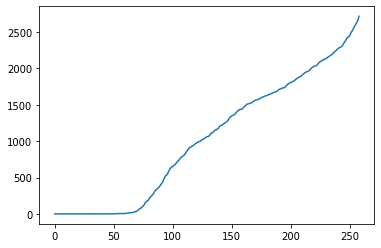

In [14]:
# plt.plot(pol.Confirmed)
# plt.plot(pol.Recovered)
plt.plot(pol.Deaths)
plt.show()

In [7]:
df.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [2]:
url = requests.get("https://www.worldometers.info/coronavirus/").text
html_source = re.sub(r'<.*?>', lambda g: g.group(0).upper(), url)

df = pd.read_html(html_source)
df[0]

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
0,NaN,North America,9263898,"+6,974",320984.0,+520,6045438.0,"+4,875",2897476.0,17868.0,NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN
1,NaN,Asia,11314864,"+25,199",205343.0,+497,9608203.0,"+18,994",1501318.0,20745.0,NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN
2,NaN,South America,8396844,+361,264204.0,+27,7284171.0,+535,848469.0,18003.0,NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN
3,NaN,Europe,5552009,"+29,177",227223.0,+491,2935700.0,"+13,897",2389086.0,9674.0,NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN
4,NaN,Africa,1536839,"+2,345",36929.0,+44,1275196.0,+110,224714.0,1619.0,NaN,NaN,NaN,NaN,NaN,Africa,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,NaN,Total:,5552009,"+29,177",227223.0,+491,2935700.0,"+13,897",2389086.0,9674.0,NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN
228,NaN,Total:,1536839,"+2,345",36929.0,+44,1275196.0,+110,224714.0,1619.0,NaN,NaN,NaN,NaN,NaN,Africa,NaN,NaN,NaN
229,NaN,Total:,31872,+11,940.0,+2,29087.0,+29,1845.0,15.0,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN
230,NaN,Total:,721,NaN,15.0,NaN,651.0,NaN,55.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def clean_df(df):
    cols_to_replace = ["NewCases", "NewDeaths", "NewRecovered"]

    for col in cols_to_replace:
        df[col] = df[col].astype(str)
        df[col] = df[col].apply(lambda x : x.replace("+", ""))
        df[col] = df[col].apply(lambda x : x.replace(",", "")).astype(float)
    return df
clean_df(df[0])

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
0,NaN,North America,9263898,6974.0,320984.0,520.0,6045438.0,4875.0,2897476.0,17868.0,NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN
1,NaN,Asia,11314864,25199.0,205343.0,497.0,9608203.0,18994.0,1501318.0,20745.0,NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN
2,NaN,South America,8396844,361.0,264204.0,27.0,7284171.0,535.0,848469.0,18003.0,NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN
3,NaN,Europe,5552009,29177.0,227223.0,491.0,2935700.0,13897.0,2389086.0,9674.0,NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN
4,NaN,Africa,1536839,2345.0,36929.0,44.0,1275196.0,110.0,224714.0,1619.0,NaN,NaN,NaN,NaN,NaN,Africa,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,NaN,Total:,5552009,29177.0,227223.0,491.0,2935700.0,13897.0,2389086.0,9674.0,NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN
228,NaN,Total:,1536839,2345.0,36929.0,44.0,1275196.0,110.0,224714.0,1619.0,NaN,NaN,NaN,NaN,NaN,Africa,NaN,NaN,NaN
229,NaN,Total:,31872,11.0,940.0,2.0,29087.0,29.0,1845.0,15.0,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN
230,NaN,Total:,721,NaN,15.0,NaN,651.0,NaN,55.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
regions = ["Poland", "World"]
d = data["Country,Other"].values
countries_to_show = ([country for country in countries_to_show if (country in regions) else "other"])
countries_to_show

SyntaxError: invalid syntax (<ipython-input-4-e2cc25d553c3>, line 3)

In [ ]:
data = data[:223]
data

In [ ]:
data.dtypes

In [ ]:
cols_to_replace = ["NewCases", "NewDeaths", "NewRecovered"]

for col in cols_to_replace:
    try:
        data[col] = data[col].str.replace("+", "", regex=False)
        data[col] = data[col].str.replace(",", "", regex=False).astype(float)
    except:
        next

In [ ]:
data.dtypes

In [ ]:
data

In [ ]:
data[data.Population > 0]

In [ ]:
data.sum().to_frame().style.format("{:.0f}")

In [ ]:
data_to_drop = ["TotalCases", "TotalRecovered", "TotalDeaths", "TotalTests","Population"]
data.drop(data_to_drop, axis=1).sum().plot(kind="bar", figsize=(16, 6))

In [ ]:
with open("countries.txt", "r") as f:
    countries_list = f.read()
countries_list.split("\n")[:-1]

In [ ]:
data.sum().groupby(["Continent"])

In [ ]:
continents = set([d for d in data["Continent"] if type(d) == str])
continents

In [ ]:
countries = list([ d for d in data["Country,Other"] if type(d) == str and d not in continents])
countries

In [168]:
with open("countries.txt", "w") as f:
    for country in countries:
        f.write(country + "\n")